In [1]:
# Miguel Angel Martinez Moncada 1945469 Practica 8 Forecasting
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Se lee el dataset preparado
df = pd.read_csv("Data Cleaning dataset-MAMM.csv")

# Se imprime el dataset
print(df)

      vendedor_1  vendedor_2   producto       fecha
0              5           5   CONSOLA9  05/05/2024
1              4           7   SMARTWAT  01/07/2012
2              4          11  CELULAA01  24/07/2010
3              5           9   AIRE2200  03/03/2016
4              5           4   SMARTWAT  30/06/2015
...          ...         ...        ...         ...
4995           2           8   LAPTOP15  21/05/2024
4996           4           6   LAPTOP15  19/08/2018
4997           7           6   CAMARAHD  02/05/2013
4998           6           4       TV42  10/07/2022
4999           3           9    DRONE99  30/09/2023

[5000 rows x 4 columns]


In [2]:
# Convertir fechas a valores numéricos
df['fecha_ordinal'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y').map(pd.Timestamp.toordinal)

# Ordenar por fecha
df = df.sort_values('fecha_ordinal')

# Separar variables
X = df[['fecha_ordinal']]
y = df['vendedor_2']

# Dividir datos en entrenamiento y prueba (80/20)
split = int(len(df) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [3]:
# Se entrena el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)
#R²	Interpretación
#0.00 No hay relación lineal
#0.30 Relación débil, pero detectable
#0.50 Relación moderada
#0.70 Buena capacidad explicativa
#1.00 Explicación perfecta (raro en datos reales)

R² Score: -0.0011675811567590788


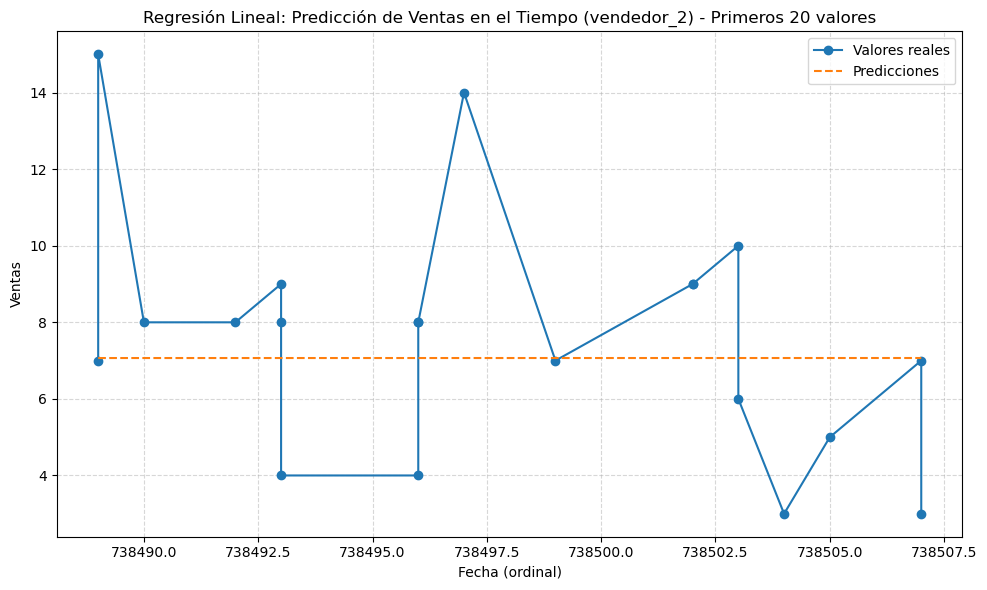

In [12]:
plt.figure(figsize=(10, 6))

# Mostrara solo los primeros 20 valores que con los 5000 no se entendera nada
plt.plot(df['fecha_ordinal'][split:][:20], y_test.values[:20], label='Valores reales', marker='o')
plt.plot(df['fecha_ordinal'][split:][:20], y_pred[:20], label='Predicciones', linestyle='--')

plt.title('Regresión Lineal: Predicción de Ventas en el Tiempo (vendedor_2) - Primeros 20 valores')
plt.xlabel('Fecha (ordinal)')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

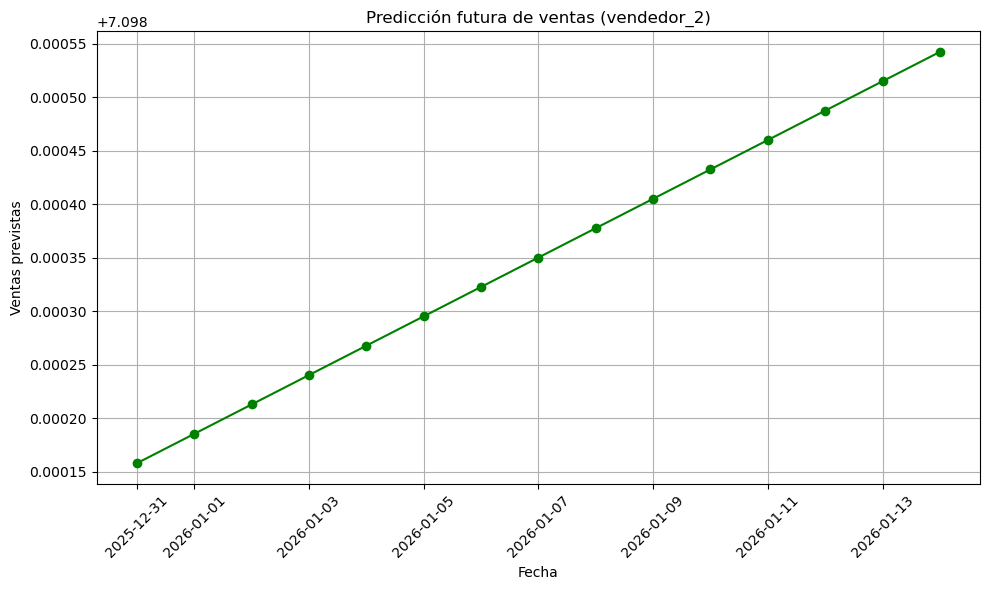

In [8]:
# Generar fechas futuras
futuras_fechas = pd.date_range(start=df['fecha'].max(), periods=15, freq='D')
futuras_ordinales = futuras_fechas.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Predecir
# Crear un DataFrame con las fechas futuras y las predicciones
df_futuras = pd.DataFrame({
    'fecha': futuras_fechas,
    'prediccion_vendedor_2': predicciones_futuras
})

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_futuras['fecha'], df_futuras['prediccion_vendedor_2'], marker='o', linestyle='-', color='green')
plt.title('Predicción futura de ventas (vendedor_2)')
plt.xlabel('Fecha')
plt.ylabel('Ventas previstas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()